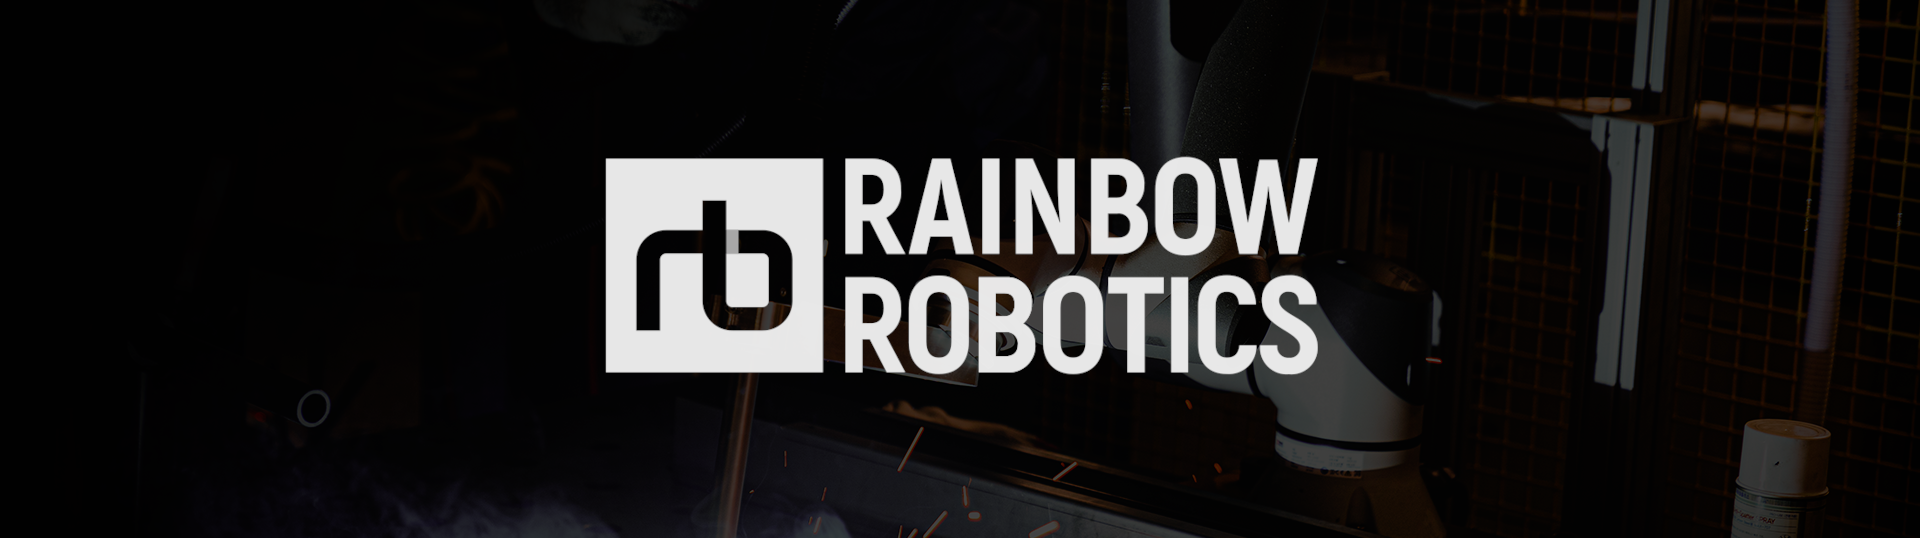

In [1]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import rbpodo as rb

In [3]:
import time
import numpy as np
from matplotlib import pyplot as plt

In [4]:
ROBOT_ADDRESS = "10.0.2.7"

robot = rb.Cobot(ROBOT_ADDRESS)
data_channel = rb.CobotData(ROBOT_ADDRESS)

In [5]:
rc = rb.ResponseCollector()

In [6]:
robot.set_operation_mode(rc, rb.OperationMode.Real)
robot.set_speed_bar(rc, 1.0)

{ "type": Success, "remain_time": -1 }

In [7]:
blending_value = [0.01, 5.0, 20.0, 50.0]
q = []

for bv in blending_value:
    robot.move_jb2_clear(rc)
    robot.move_jb2_add(rc, np.array([90, 0, 0, 0, 0, 0]), 100, 100, bv)
    robot.move_jb2_add(rc, np.array([0, 0, 0, 0, 0, 0]), 100, 100, bv)
    robot.move_jb2_add(rc, np.array([90, 0, 0, 0, 0, 0]), 100, 100, bv)
    robot.move_jb2_add(rc, np.array([0, 0, 0, 0, 0, 0]), 100, 100, bv)
    robot.move_jb2_add(rc, np.array([90, 0, 0, 0, 0, 0]), 100, 100, bv)
    
    robot.flush(rc)
    robot.move_jb2_run(rc)

    data = []
    if robot.wait_for_move_started(rc, 0.5).type() == rb.ReturnType.Success:
        while robot.wait_for_move_finished(rc, 0.).type() == rb.ReturnType.Timeout:
            data.append(data_channel.request_data().sdata.jnt_ref)
            time.sleep(0.01)
        q.append(np.squeeze(np.array(data)[:, 0]))
q = np.vstack([np.hstack((e, np.tile(e[-1], max([e.shape[0] for e in q]) - e.shape[0]))) for e in q])

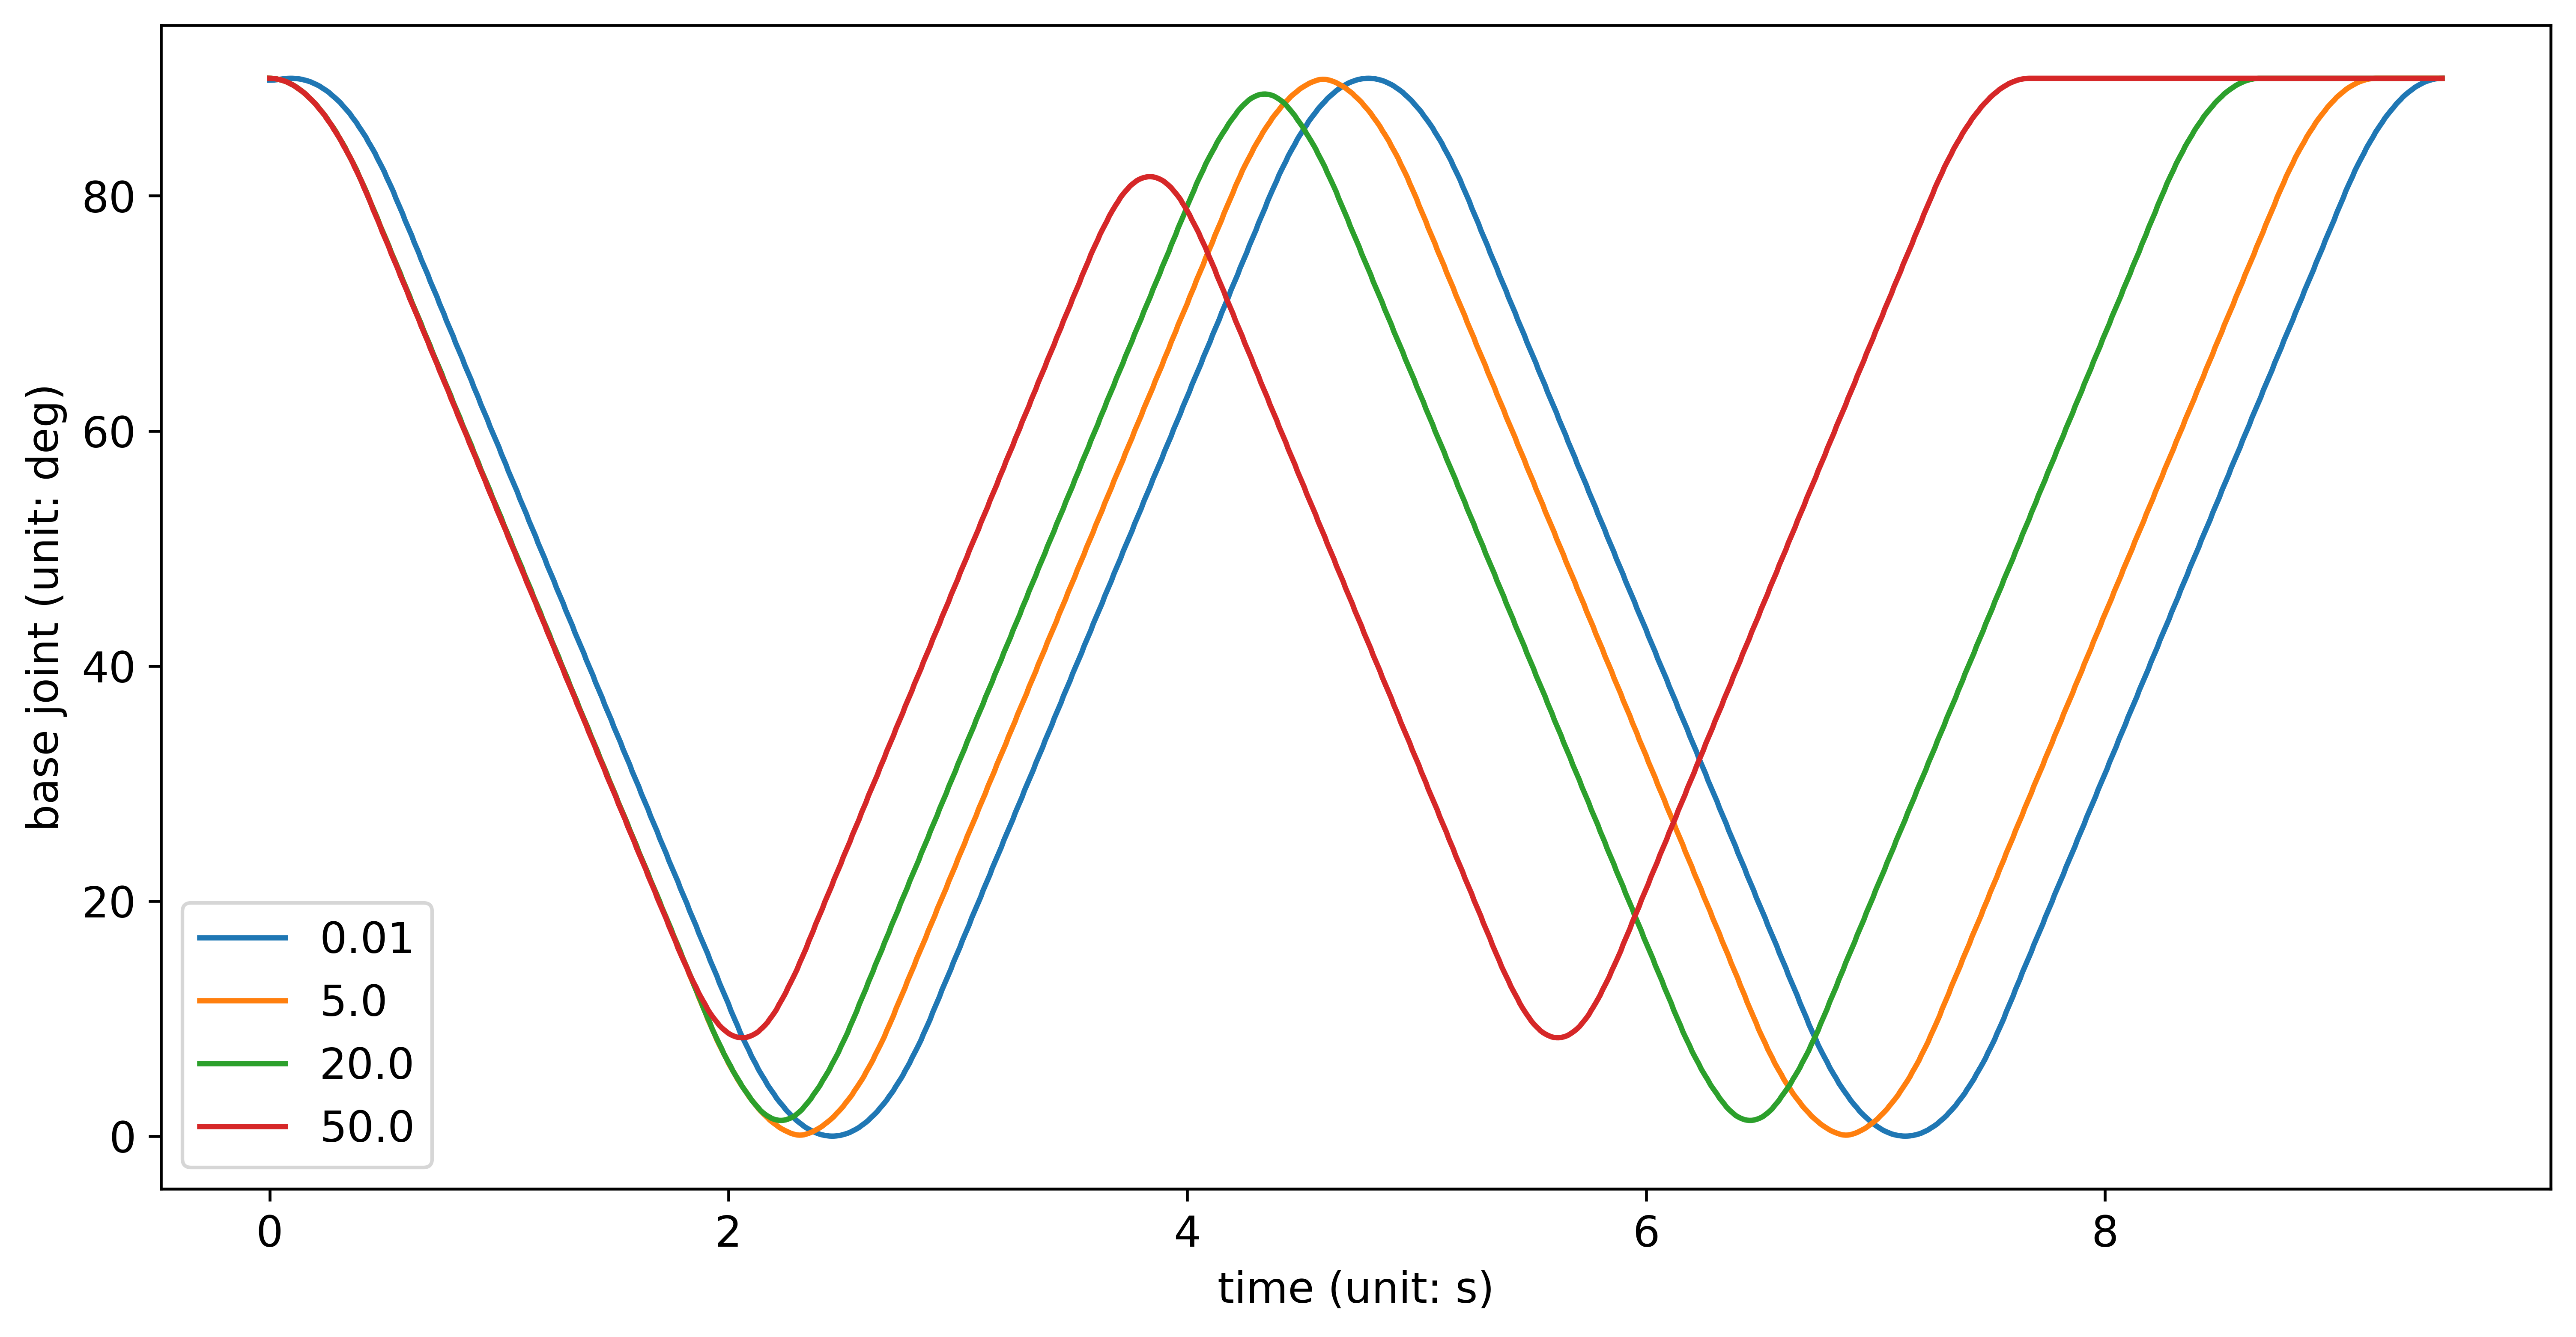

In [8]:
plt.figure(figsize=(12,6), facecolor='white', dpi=600)
plt.rcParams.update({'font.size': 12})

plt.plot(np.arange(0, q.shape[1]) * 0.01, np.transpose(q))
plt.xlabel('time (unit: s)')
plt.ylabel('base joint (unit: deg)')
plt.legend(blending_value)